# Basic concepts of Mol2vec

This notebook covers basic concepts of [Mol2vec](https://chemrxiv.org/articles/Mol2vec_Unsupervised_Machine_Learning_Approach_with_Chemical_Intuition/5513581) from generation of "molecular sentences" to plotting embeddings obtained with Mol2vec.
* [Encoding substructures of a molecule as words](#Encoding-substructures-of-a-molecule-as-words)
* [Exploring Mol2vec embeddings](#Exploring-Mol2vec-embeddings)
* [Plotting of an amino acid (ALA) substructure vectors](#Plotting-of-an-amino-acid-%28ALA%29-substructure-vectors)
* [Plotting all amino acids in grid plot](#Plotting-all-amino-acids-in-grid-plot)


In [1]:
import sys

sys.path.append("..")

In [2]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt
import seaborn as sns
from mol2vec.features import mol2alt_sentence, MolSentence, DfVec, sentences2vec
from mol2vec.helpers import depict_identifier, plot_2D_vectors, IdentifierTable, mol_to_svg

Canonical SMILES of amino acids

In [3]:
aa_smis = ['CC(N)C(=O)O', 'N=C(N)NCCCC(N)C(=O)O', 'NC(=O)CC(N)C(=O)O', 'NC(CC(=O)O)C(=O)O',
          'NC(CS)C(=O)O', 'NC(CCC(=O)O)C(=O)O', 'NC(=O)CCC(N)C(=O)O', 'NCC(=O)O',
          'NC(Cc1cnc[nH]1)C(=O)O', 'CCC(C)C(N)C(=O)O', 'CC(C)CC(N)C(=O)O', 'NCCCCC(N)C(=O)O',
          'CSCCC(N)C(=O)O', 'NC(Cc1ccccc1)C(=O)O', 'O=C(O)C1CCCN1', 'NC(CO)C(=O)O',
          'CC(O)C(N)C(=O)O', 'NC(Cc1c[nH]c2ccccc12)C(=O)O', 'NC(Cc1ccc(O)cc1)C(=O)O',
          'CC(C)C(N)C(=O)O']
aa_codes = ['ALA', 'ARG', 'ASN', 'ASP', 'CYS', 'GLU', 'GLN', 'GLY', 'HIS', 'ILE', 
            'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL']

Generating molecules

In [4]:
aas = [Chem.MolFromSmiles(x) for x in aa_smis]

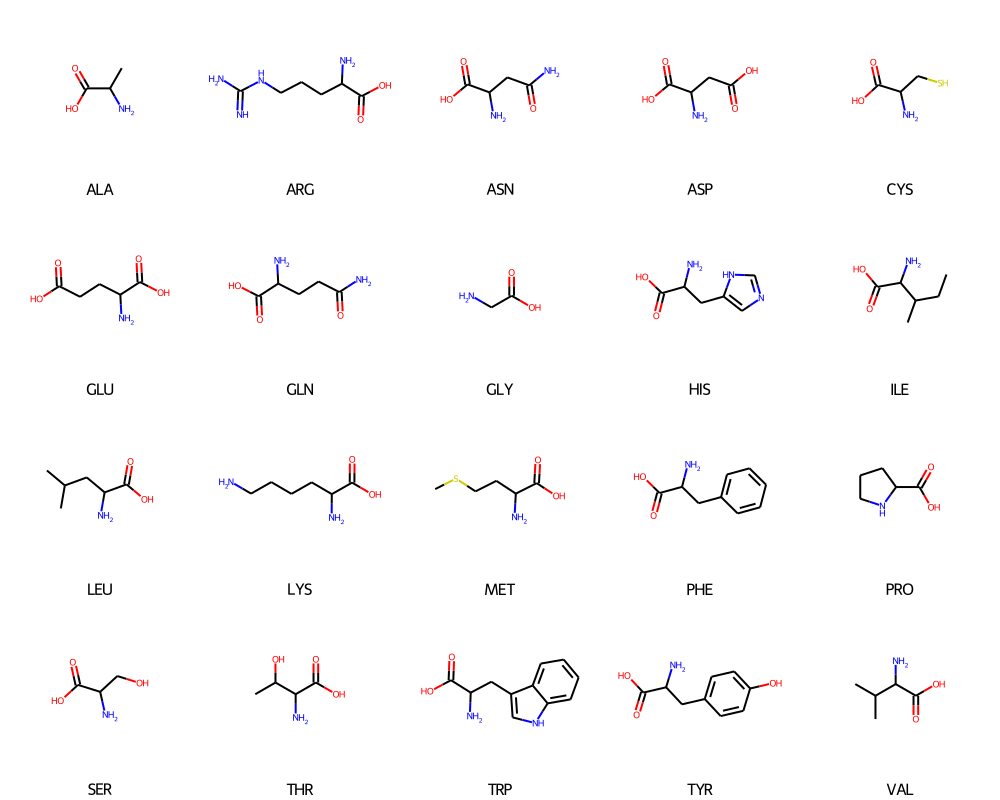

In [5]:
Draw.MolsToGridImage(aas, molsPerRow=5, useSVG=False, legends=aa_codes)

### Encoding substructures of a molecule as words

Mol2vec is based on [Word2vec](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf) algorithm and we first have to encode molecules as sentences, meaning that each substructure (represented by Morgan identifier) represents a word.

In [6]:
sentence = mol2alt_sentence(aas[0], 1)
sentence

['2246728737',
 '3537119515',
 '2245273601',
 '2655406212',
 '847957139',
 '2599973650',
 '2246699815',
 '3855312692',
 '864942730',
 '1510328189',
 '864662311',
 '1533864325']

Depict a specific Morgan identifier - *depict_identifier(mol, identifier, radius)*

[10:42:27] The new font size 0.8 is below the current minimum (6).


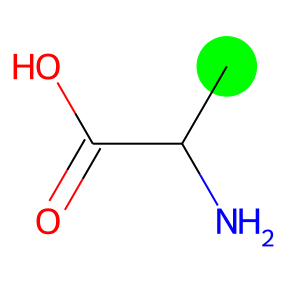

In [7]:
depict_identifier(aas[0], 2246728737, 1)

To depict all identifiers one can use IdentifierTable object -   
*IdentifierTable(identifiers_to_depict, mols_containing_selected_identifiers, sentences_for_mols, number_of_columns, radius)*

In [8]:
it = IdentifierTable(sentence, [aas[0]]*len(sentence), [sentence]*len(sentence), 5, 1)

[10:42:27] The new font size 0.8 is below the current minimum (6).
[10:42:27] The new font size 0.8 is below the current minimum (6).
[10:42:27] The new font size 0.8 is below the current minimum (6).
[10:42:27] The new font size 0.8 is below the current minimum (6).
[10:42:27] The new font size 0.8 is below the current minimum (6).
[10:42:27] The new font size 0.8 is below the current minimum (6).
[10:42:27] The new font size 0.8 is below the current minimum (6).
[10:42:27] The new font size 0.8 is below the current minimum (6).
[10:42:27] The new font size 0.8 is below the current minimum (6).
[10:42:27] The new font size 0.8 is below the current minimum (6).
[10:42:27] The new font size 0.8 is below the current minimum (6).
[10:42:27] The new font size 0.8 is below the current minimum (6).


In [9]:
it

Sentences can be used to generate a corpus that can be used to train Mol2vec model. To generate high quality embeddings of substructures we recommend using a big database of molecules (millions) and use the command line scripts to prepare the corpus and train Mol2vec model.  
Type `mol2vec -h` into the command line to learn more.


### Exploring Mol2vec embeddings

Mol2vec uses [gensim implementation of Word2vec](https://radimrehurek.com/gensim/models/word2vec.html)

In [10]:
from gensim.models import word2vec

Load a pre-trained Mol2vec model which was trained on 20 million compounds downloaded from [ZINC](http://zinc.docking.org/) using:
- radius 1
- `UNK` to replace all identifiers that appear less than 4 times
- skip-gram and window size of 10
- resulting in 300 dimensional embeddings

In [11]:
model = word2vec.Word2Vec.load('models/model_300dim.pkl')

Number of unique identifiers represented as vectors

In [12]:
len(model.wv)

21003

Feature vector representing above depicted identifier **`2246728737`**

In [13]:
model.wv.get_vector('2246728737')

array([-0.13674529,  0.06729241, -0.05213054, -0.00750703,  0.28921816,
       -0.13024387, -0.18778022, -0.08180202,  0.17663261, -0.23623651,
        0.15215029,  0.03104335,  0.22715245, -0.00406356,  0.0321878 ,
       -0.14886402,  0.35155123,  0.05230371,  0.25634497,  0.14891872,
       -0.0038601 ,  0.16931136,  0.31372482,  0.01881147, -0.19952172,
        0.03404459, -0.04627627, -0.21893106,  0.12341108,  0.05439068,
        0.05448844, -0.04903906, -0.31361288, -0.33548406, -0.04213666,
       -0.14339392, -0.0289033 , -0.0923715 ,  0.18249372,  0.1544386 ,
       -0.09051799,  0.07533539, -0.01364344, -0.17796858, -0.06144299,
       -0.00402305, -0.10959177,  0.09328562, -0.08955006,  0.15117231,
        0.12398589, -0.20872705,  0.3017063 , -0.16636986, -0.26913744,
       -0.12916061, -0.15348934,  0.11056198, -0.02592117, -0.06371941,
       -0.19357003,  0.00200986, -0.05617516,  0.0011254 , -0.5563765 ,
        0.04836231, -0.00086217,  0.08364478, -0.30566263,  0.05

Extraction of identifiers from molecules (amino acids)

In [14]:
aa_sentences = [mol2alt_sentence(x, 1) for x in aas]
flat_list = [item for sublist in aa_sentences for item in sublist]
aa_identifiers_unique = set(flat_list)

In [15]:
df_vec = pd.DataFrame()
df_vec['identifier'] = list(aa_identifiers_unique)
df_vec.index = df_vec['identifier']

Number of unique identifiers in amino acids

In [16]:
len(df_vec)

75

Projection of 300 dimensional vectors (representing identifiers) to 2 dimensions using a combination of PCA and t-SNE.  
We recommend fitting PCA/t-SNE using all identifiers to get better projections.

In [17]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [18]:
pca_model = PCA(n_components=30)
tsne_model = TSNE(n_components=2, perplexity=10, n_iter=1000, metric = 'cosine')
tsne_pca = tsne_model.fit_transform(pca_model.fit_transform([model.wv.get_vector(x) for x in aa_identifiers_unique]))

/Users/guyrosin/miniconda3/envs/mol2vec/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/guyrosin/miniconda3/envs/mol2vec/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Save the two principal components to the data frame

In [19]:
df_vec['PCA-t-SNE-c1'] = tsne_pca.T[0]
df_vec['PCA-t-SNE-c2'] = tsne_pca.T[1]

In [20]:
df_vec.head(3)

,identifier,PCA-t-SNE-c1,PCA-t-SNE-c2
identifier,,,
229197718,229197718,112.791580,-141.956818
2720313463,2720313463,24.721708,123.726021
1542633699,1542633699,117.237457,-57.655640


In [21]:
projections = df_vec.to_dict()

Function that extracts projected values for plotting

In [22]:
def get_values(identifier, projections):
    return np.array((projections['PCA-t-SNE-c1'][str(identifier)],projections['PCA-t-SNE-c2'][str(identifier)]))

In [23]:
get_values(2246728737, projections)

array([  24.0473938 , -127.23397827])

### Plotting of an amino acid (ALA) substructure vectors

Substructure vectors are presented cyan and molecule vector violet.

In [24]:
aa_values = [get_values(x, projections) for x in aa_sentences[0]]

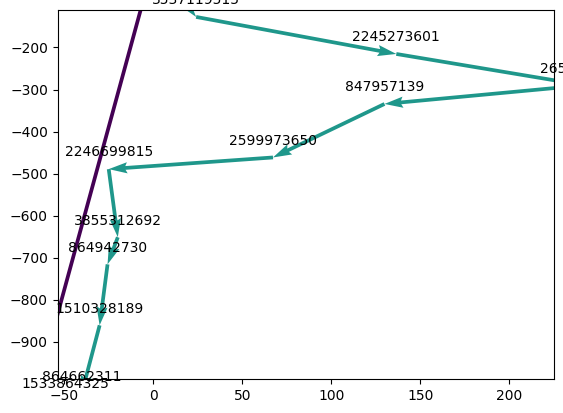

In [25]:
plot_2D_vectors(aa_values, vector_labels=aa_sentences[0] + ['ALA'], 
                );

### Plotting all amino acids in grid plot

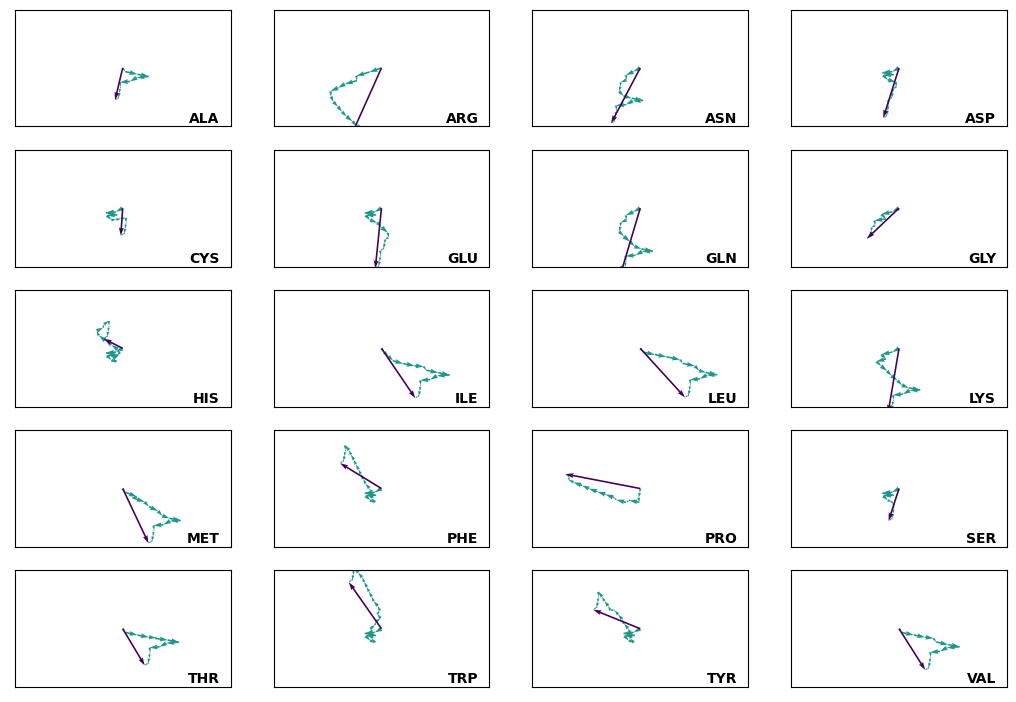

In [26]:
f, ((ALA, ARG, ASN, ASP), (CYS, GLU, GLN, GLY), (HIS, ILE, LEU, LYS), (MET, PHE, PRO, SER), (THR, TRP, TYR, VAL)) = plt.subplots(5,4, 
                                                    squeeze=True, sharex=True, sharey=True, 
                                                    figsize=(6.4*2,  4.4*2))

for aa,name,ax in zip(aas, aa_codes, (ALA, ARG, ASN, ASP, CYS, GLU, GLN, GLY, HIS, ILE, LEU, LYS, MET, PHE, PRO, SER, THR, TRP, TYR, VAL)):
    pca_subs = [get_values(x, projections) for x in mol2alt_sentence(aa, 1)]
    plot_2D_vectors(pca_subs, ax=ax, min_max_x=(-1000,1000), min_max_y=(-2000, 2000))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.text(0.95, 0.01, u"%s" % name,
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes, weight='bold',
            fontsize=10)